- Grey image는 하나의 channel로 이루어진 image이다.
- 각 pixel은 0~255의 값을 가지며, 0은 검정색, 255는 흰색, 그 이외의 색은 값이 작아질 수 록 어두워지는 회색임

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist

# 1. Data Load

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- X_train.shape = (60000,28,28)
> * 가로 28, 세로 28 pixel인 grey image 60000개
> * 만약 color image라면 3개의 channel(R,G,B)가 필요하므로, (60000,28,28,3)이 된다.

In [4]:
print(type(X_train[0]))

<class 'numpy.ndarray'>


- X_train 하나의 sample을 image로 확인하기

5


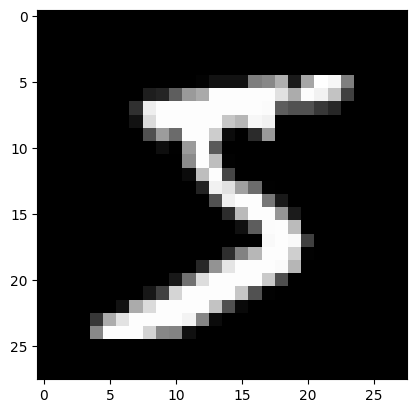

In [5]:
plt.imshow(X_train[0],cmap='gray')
print(y_train[0])

- mnist dataset은 gray image(손글씨 숫자 데이터)이며, label = 0~9이다.

3


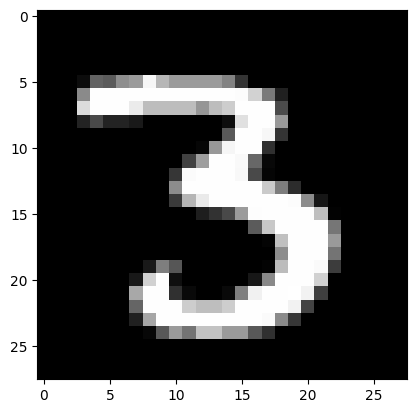

In [6]:
plt.imshow(X_train[12],cmap='gray')
print(y_train[12])

# 2. CNN model 생성

- Conv2D(kernel의 수, kernel의 크기, strides, activation, input_shape)
> * kernel의 수: image로부터 몇 종류의 특징을 추출할 것인가
> * kernel의 크기: 주로 (3,3) 사용
> * strides: kernel 한번의 step 크기, (가로이동간격, 세로이동간격)
> * activation: 활성화 함수 ('relu')
> * input_shape: 입력되는 image의 shape (가로pixel,세로pixel,channel)

- MaxPooling2D(pool_size,strides)
> * pool_size: 주로 (2,2) 사용
> * strides: default로 pool_size만큼 이동

- Flatten(): image(feature map)를 한개의 열로 변환
- Dense(units,activation)
> * units: node의 수
> * activation: 활성화 함수

In [7]:
# class의 수를 확인하고 싶을 경우, numpy.unique(arr)를 사용하면 arr가 포함하고 있는 모든 value를 한번씩 반환한다.
y_val = np.unique(y_train)
print('class의 종류: ', y_val)
print('class의 수:', len(y_val))

class의 종류:  [0 1 2 3 4 5 6 7 8 9]
class의 수: 10


In [8]:
mnist_model = Sequential([
    # 1. Convolutional layer
    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)),
    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),activation='relu'),
    # 2. Pooling layer
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    # 3. Flattening layer: 2D인 image를 Neural networks의 입력이 가능하도록 변경
    Flatten(),
    # 4. Dense: Neural networks 첫번째 layer
    Dense(units=512,activation='relu'),
    # 5. Dense: output layer (output layer node의 수는 class의 수와 동일하다.)
    #           classification의 경우, output layer의 활성화 함수는 주로 softmax를 사용한다.
    Dense(units=10,activation='softmax')
])

In [9]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1180160   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [10]:
mnist_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
# y(label)이 One-Hot-Encoding된 형태가 아닌, 일반 정수형일 경우, loss는 sparse_categorical_crossentropy를 사용한다.

In [11]:
# 각 pixel의 값을 0과 1사이의 값으로 변경
# image pixel의 최소값은 0, 최대값은 255이다.
Xsc_train = X_train/255
Xsc_test = X_test/255

In [12]:
ep = 20
batch = 512
val_ratio = 0.2

mnist_result = mnist_model.fit(Xsc_train, y_train,
                               epochs=ep,
                               batch_size=batch,
                               validation_split=val_ratio)

Epoch 1/20
94/94 [==============================] - 79s 793ms/step - loss: 0.3808 - acc: 0.8965 - val_loss: 0.1171 - val_acc: 0.9676
Epoch 2/20
94/94 [==============================] - 55s 588ms/step - loss: 0.0847 - acc: 0.9749 - val_loss: 0.0742 - val_acc: 0.9775
Epoch 3/20
94/94 [==============================] - 60s 633ms/step - loss: 0.0515 - acc: 0.9842 - val_loss: 0.0537 - val_acc: 0.9850
Epoch 4/20
94/94 [==============================] - 55s 578ms/step - loss: 0.0372 - acc: 0.9888 - val_loss: 0.0552 - val_acc: 0.9851
Epoch 5/20
94/94 [==============================] - 61s 649ms/step - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0498 - val_acc: 0.9862
Epoch 6/20
94/94 [==============================] - 56s 600ms/step - loss: 0.0208 - acc: 0.9936 - val_loss: 0.0460 - val_acc: 0.9870
Epoch 7/20
94/94 [==============================] - 56s 601ms/step - loss: 0.0163 - acc: 0.9951 - val_loss: 0.0466 - val_acc: 0.9877
Epoch 8/20
94/94 [==============================] - 59s 631ms/step - 

# 3. model 검증

In [13]:
mnist_model.evaluate(Xsc_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0424 - acc: 0.9890


[0.042436253279447556, 0.9890000224113464]

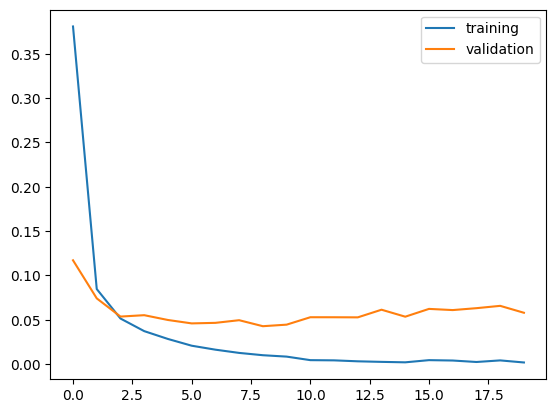

In [14]:
plt.plot(mnist_result.history['loss'])
plt.plot(mnist_result.history['val_loss'])
plt.legend(['training','validation'])

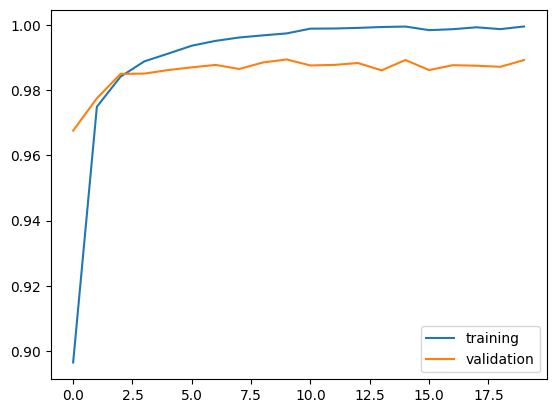

In [15]:
plt.plot(mnist_result.history['acc'])
plt.plot(mnist_result.history['val_acc'])
plt.legend(['training','validation'])

- model.predict는 각 class에 속할 확률을 반환한다.

In [16]:
pred_proba = mnist_model.predict(Xsc_test)

313/313 [==============================] - 4s 12ms/step


- 위의 predict가 반환한 ndarray에서 각 행의 값들 중, 최대값을 갖는 열의 index를 추출해야 함 = class label
- **np.argmax(ndarray,axis)**
> * axis=0일 경우, 각 열의 최대값을 갖는 **행 index**를 반환
> * axis=1일 경우, 각 행의 최대값을 갖는 **열 index**를 반환
> * `np.argmax(pred_proba,axis=1)`
> * cf> **np.max(ndarray,axis)** 는 최대값 자체를 반환함

In [17]:
pred = np.argmax(pred_proba,axis=1)

- test data 중 model이 잘못 분류한 image (image index)찾기
- **np.argwhere(조건식)**
> * 조건식이 참인 index를 반환
> * `np.argwhere(y_test != pred)`: y_test와 pred가 다른 index를 반환 ('!='는 '다르다', '=='는 '같다'는 의미)
> * cf> **np.where(조건식)**은 True / False를 반환

In [18]:
wrong_ind = np.argwhere(y_test != pred)

- wrong_ind는 test data 중 잘못 분류된 image의 index를 가지고 있음

In [19]:
print('the number of wrong classified data: ', len(wrong_ind))

the number of wrong classified data:  110


- 잘못 분류된 test image의 index

In [20]:
print(wrong_ind.shape)
print(wrong_ind[1])
# wrong_ind는 2d array의 형태이며, wrong_ind[i]는 정수가 아닌 1d의 array를 반환한다.
# image를 show하기 위한 index로 1d array를 사용할 수 없다.
# ex> plt.imshow([1]) 는 오류 발생
#     plt.imshow(1) 이 되어야 함
# wrong_ind[i]가 array가 아닌 정수 값을 반환하도록 하기 위해 1d array로 변환한다.

(110, 1)
[321]


In [21]:
# wrong_ind를 1d array로 변환
# ndarray.ravel()은 ndarray를 1d array로 변환해준다.
wrong_ind = wrong_ind.ravel()
# 또는 wrong_ind = wrong_ind.reshape(-1)
print(wrong_ind.shape)
print(wrong_ind[1])

(110,)
321


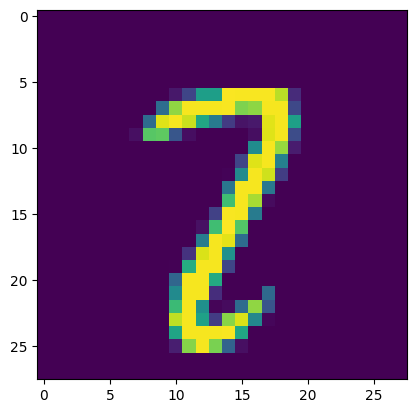

In [22]:
plt.imshow(X_test[wrong_ind[1]])

- 잘못 분류된 10개의 image를 시각화함
- 실제 class label과 예측된 class label도 나타냄

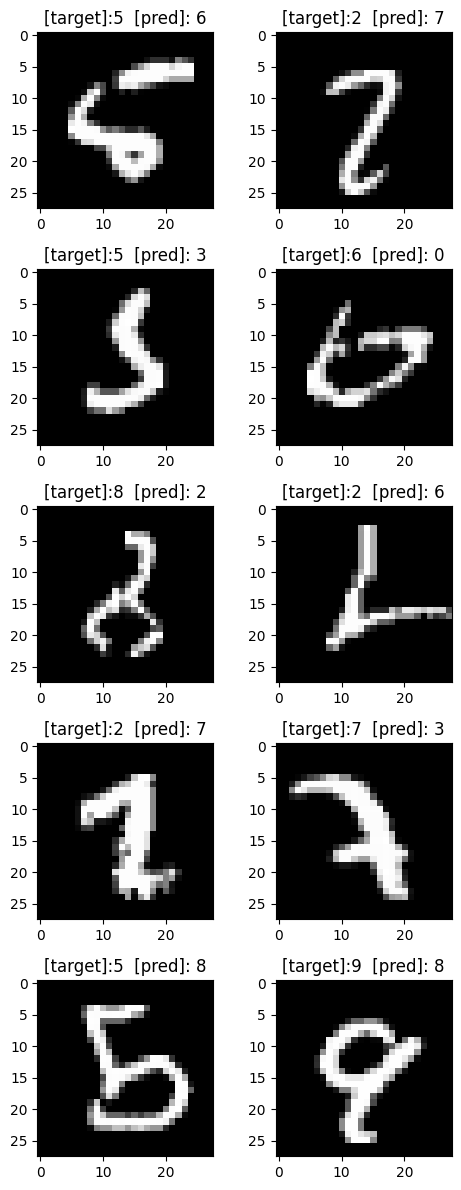

In [23]:
# wrong_ind[:10]: wrong_ind 중 첫 10개의 값
j = 1
plt.figure(figsize=(5,12))
for i in wrong_ind[:10]:
  plt.subplot(5,2,j)
  plt.imshow(X_test[i],cmap='gray')
  plt.title('[target]:'+ str(y_test[i])+'  [pred]: '+ str(pred[i]))
  # 출력 → ex> [target]: 3  [pred]: 5
  j=j+1

plt.tight_layout()